In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lumicks import pylake

%matplotlib inline

# Confocal images

[Download this page as a Jupyter notebook](_downloads/89b88dbb8f3bf9ebe57e58b3c9765690/images.ipynb)

The following code uses scans as an example. Kymographs work the same way – just substitute `file.scans` with `file.kymos`. To load an HDF5 file and lists all of the scans inside of it, run:

In [10]:
from lumicks import pylake
filename = r'/mnt/d/ctrap/data/2019-03-29 trap training/20190328-190753 1mM Spermine 1uM DNA Scan 19.h5'
file = pylake.File(filename)
print(file)
print(list(file.scans))  # e.g. shows: "['reference', 'bleach', 'imaging']"
#list(file.scans)  # e.g. shows: "['reference', 'bleach', 'imaging']"
for fxn in dir(file.scans):
    if not fxn.startswith('_'):
        print(fxn)

File root metadata:
- Bluelake version: 1.5.5
- Description: 1mM Spermine 1uM DNA. 10 percent Cy3 labeled DNA, no biotin label. widom 601 (MP vector amplicon). 

- Experiment: 1mM Spermine 1uM DNA
- Export time (ns): 1553814473028346000
- File format version: 2
- GUID: {A0F6400C-7A0B-46E0-BE95-0BAA97F6D7D4}

Calibration:
  55:
    Force 1x
    Force 1y
    Force 2x
    Force 2y
    JSON:
    - Data type: object
    - Size: 1
Confocal diagnostics:
  Excitation Laser Blue:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1
  Excitation Laser Green:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1
  Excitation Laser Red:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1
Diagnostics:
  Pressure:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 1318
Distance:
  Distance 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 5772
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 26058553
  Force 1y:
  -

Once again, `.scans` is a regular Python dictionary so we can easily iterate over it:

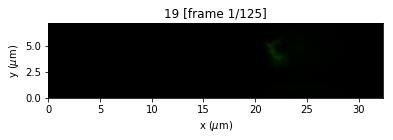

In [17]:
# Plot all scans in a file
for name, scan in file.scans.items():
    scan.plot_rgb()
    plt.savefig(name)

Or just pick a single one:

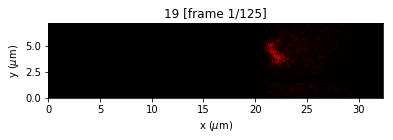

In [19]:
scan = file.scans['19']
scan.plot_red()

Access the raw image data:

125

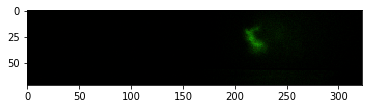

In [32]:
rgb = scan.rgb_image  # matrix with `shape == (h, w, 3)`
blue = scan.blue_image  # single color so `shape == (h, w)`

# Plot manually
plt.imshow(rgb[0])
scan.num_frames

The images contain pixel data where each pixel is made up a multiple photon count samples collected by the scanner. For an even lower-level look at data, the raw photon count samples can be accessed:

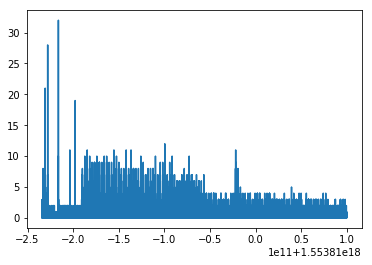

In [33]:
photons = scan.red_photon_count
plt.plot(photons.timestamps, photons.data)

The images can also be exported in the TIFF format:

In [79]:
#dt = np.dtype(np.int16)



#scan.save_tiff("image.tiff")
#scan.save_tiff("image.tiff", [image.astype(np.int16), True])
scan.save_tiff("image.tiff", dtype=np.float16)
print(np.float16)

<class 'numpy.float16'>


Multi-frame scans are also supported:

125
(125, 72, 323)
(125, 72, 323, 3)


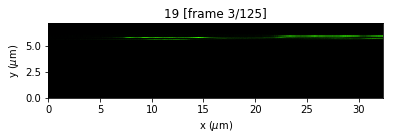

In [76]:
print(scan.num_frames)
print(scan.blue_image.shape)  # (self.num_frames, h, w) -> single color channel
print(scan.rgb_image.shape)  # (self.num_frames, h, w, 3) -> three color channels
scan.plot_rgb(frame=3)  # plot the third frame -- defaults to the first frame if no argument is given
#scan.plot()  # plot the third frame -- defaults to the first frame if no argument is given